In [1]:
import numpy as np
import matplotlib.pyplot as plt
from read_data import ReadData

In [2]:
d = ReadData("disk.out1.00100.athdf") # read data and grid into numpy arrays
for k in d:
    print(k, d[k].shape)
# x1f, x1v for face/cell centered value, respectively. len(rf) = len(r)+1
# x1, x2, x3 = r, theta, phi
# data are indexed by phi, theta, r

x1v (480,)
x3v (480,)
x1f (481,)
x3f (481,)
x2v (64,)
x2f (65,)
rho (480, 64, 480)
press (480, 64, 480)
vel1 (480, 64, 480)
vel2 (480, 64, 480)
vel3 (480, 64, 480)


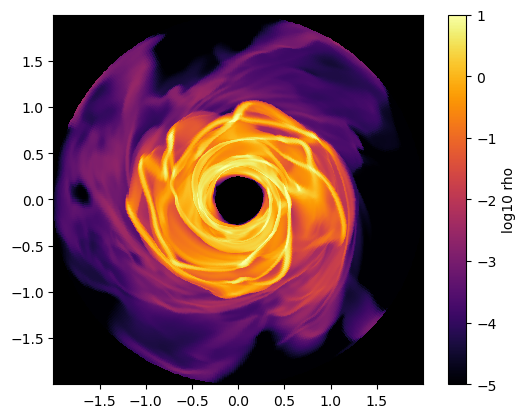

In [3]:
# example for making a midplane (theta=pi/2) slice
r = d['x1v']
rf = d['x1f']
th = d['x2v']
i_mid = np.argmin(np.abs(th-np.pi/2))
phi = d['x3v']
phif = d['x3f']
xf, yf = np.cos(phif)[:,None]*rf, np.sin(phif)[:,None]*rf
plt.figure()
plt.pcolormesh(xf,yf,np.log10(d['rho'][:,i_mid,:]),vmin=-5,vmax=1,cmap='inferno')
plt.gca().set_aspect('equal','box')
plt.gca().set_facecolor('k')
plt.colorbar(label='log10 rho')